Making animated plots of simulation trajectory data

1. Plotting ice fraction as a function of temperature, with a time ticker in the corner
2. Adding the rendered graphics from Ovito into the figure

Next stage: Plotting density profile, and deltaV, as a function of distance from the substrate

1. Make data file from the dump files: 
    Timestep, R1, R2, R3 .....
    [step], [density at R1], [density at R2], .....
2. Plot vertically with time and temperature ticker in the corner
3. Add the rendered graphics from Ovito to the figure

Logistics:

Script should be modular -> specify which run to use
Script will go into the specific run folder and find the data
Inside the run folder should already be a folder containing all the rendered Ovito frames (this needs to be done ahead of time)

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation

test_data = "mW/1_atm/analysis/test_1/ice_ratio.dat"

ice_ratio = pd.read_csv(test_data, sep='\t', header=None, names=['timestep','time (ns)','temperature (K)','ice', 'liquid', 'total', 'ice/total'])

print(ice_ratio.head())



   timestep  time (ns)  temperature (K)  ice  liquid  total  ice/total
0         0       0.00          225.000  781    3195   3976   0.196429
1      1000       0.01          224.998  730    3246   3976   0.183602
2      2000       0.02          224.995  710    3266   3976   0.178571
3      3000       0.03          224.993  742    3234   3976   0.186620
4      4000       0.04          224.990  709    3267   3976   0.178320


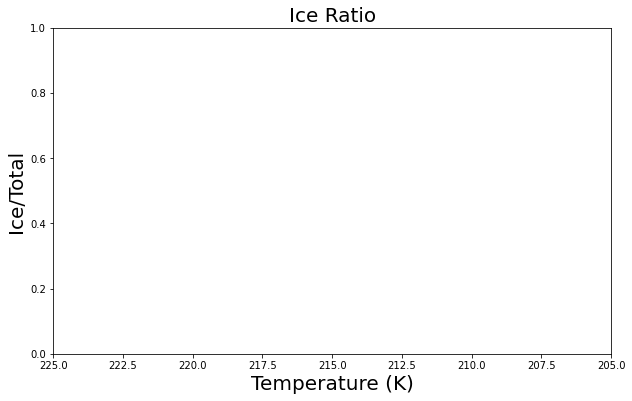

In [8]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

fig = plt.figure(figsize=(10,6))
plt.xlim(225, 205)
plt.ylim(0, 1)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Ice/Total',fontsize=20)
plt.title('Ice Ratio',fontsize=20)

def animate(i):
    data = ice_ratio.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data['temperature (K)'], y=data['ice/total'], data=data, color="r")
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=7)
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=17, repeat=True)

plt.show()